#Import library

In [88]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

# 'Pandas' is used for data manipulation and analysis
import pandas as pd
# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
import joblib


#Import Data Set

In [51]:
df = pd.read_csv('/content/xAPI-Edu-Data (1).csv')
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [52]:
import pandas as pd

df = pd.read_csv("/content/xAPI-Edu-Data (1).csv")

# Add student_id column
df.insert(0, "student_id", range(1, len(df) + 1))

# Save updated file
df.to_csv("student_dropout_predictions_with_id.csv", index=False)


Data Exploration

In [53]:
df.head()

,student_id,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,5,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [54]:
df.tail()

,student_id,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
475,476,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,478,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,479,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L
479,480,F,Jordan,Jordan,MiddleSchool,G-08,A,History,S,Father,35,14,23,62,No,Bad,Above-7,L


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   student_id                480 non-null    int64 
 1   gender                    480 non-null    object
 2   NationalITy               480 non-null    object
 3   PlaceofBirth              480 non-null    object
 4   StageID                   480 non-null    object
 5   GradeID                   480 non-null    object
 6   SectionID                 480 non-null    object
 7   Topic                     480 non-null    object
 8   Semester                  480 non-null    object
 9   Relation                  480 non-null    object
 10  raisedhands               480 non-null    int64 
 11  VisITedResources          480 non-null    int64 
 12  AnnouncementsView         480 non-null    int64 
 13  Discussion                480 non-null    int64 
 14  ParentAnsweringSurvey     

In [56]:
df.shape

(480, 18)

In [57]:
df.duplicated().sum()

np.int64(0)

In [58]:
df_clean = df.drop_duplicates()
df_clean.shape

(480, 18)

In [59]:
df.isnull().sum()

,0
student_id,0
gender,0
NationalITy,0
PlaceofBirth,0
StageID,0
GradeID,0
SectionID,0
Topic,0
Semester,0
Relation,0


In [92]:
# le = LabelEncoder()

# for col in df.columns:
#     if df[col].dtype == 'object':
#         df[col] = le.fit_transform(df[col])

Check Target Distribution

In [60]:
df['Class'].value_counts()

,count
Class,
M,211
H,142
L,127


Create Target Column (dropout)

In [61]:
#Low performers are at risk of dropout
#Medium & High → likely to continue

df['dropout'] = df['Class'].apply(lambda x: 1 if x == 'L' else 0)

In [62]:
df['dropout'].value_counts()

,count
dropout,
0,353
1,127


In [63]:
# df['dropout'] = df['dropout'].map({'Yes': 1, 'No': 0}) # This line caused 'dropout' to become NaN

In [64]:
#To check Coloumn Name Change/Create
df.head()

,student_id,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,dropout
0,1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,0
1,2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,0
2,3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,1
3,4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,1
4,5,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,0


In [78]:
#Feature Selection (Early Signals)
X = df.drop(['dropout', 'student_id', 'Class'], axis=1)
y = df['dropout']

num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

Target Variable Distribution

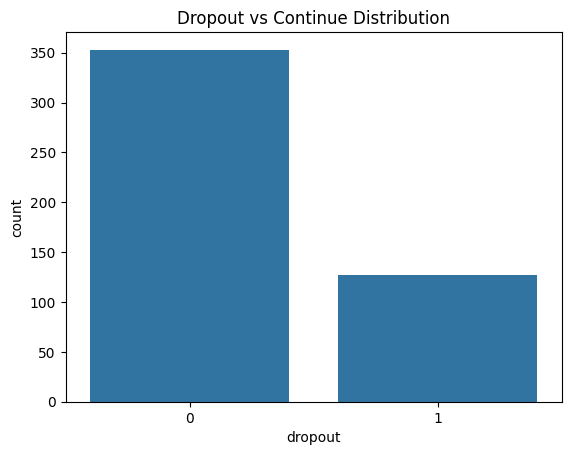

In [66]:
#Dataset is slightly imbalanced
#Justifies using class_weight='balanced' in model

sns.countplot(x='dropout', data=df)
plt.title("Dropout vs Continue Distribution")
plt.show()


Numerical Features Analysis
Summary statistics

In [67]:
df.describe()

,student_id,raisedhands,VisITedResources,AnnouncementsView,Discussion,dropout
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,240.500000,46.775000,54.797917,37.918750,43.283333,0.264583
std,138.708327,30.779223,33.080007,26.611244,27.637735,0.441571
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,120.750000,15.750000,20.000000,14.000000,20.000000,0.000000
50%,240.500000,50.000000,65.000000,33.000000,39.000000,0.000000
75%,360.250000,75.000000,84.000000,58.000000,70.000000,1.000000
max,480.000000,100.000000,99.000000,98.000000,99.000000,1.000000


Attendance & Engagement vs Dropout,

Dropout-risk students show:

Fewer raised hands,

Lower LMS usage,

Lower discussion participation

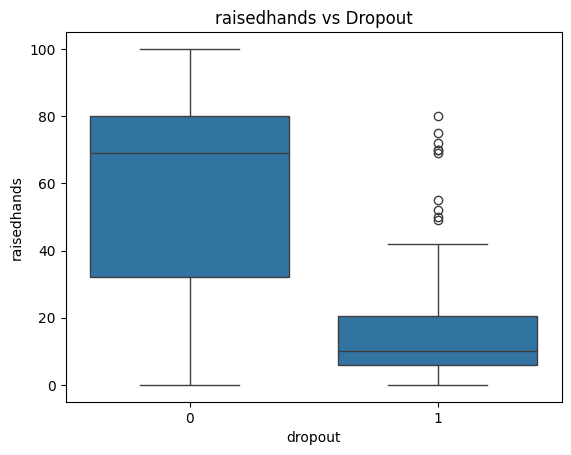

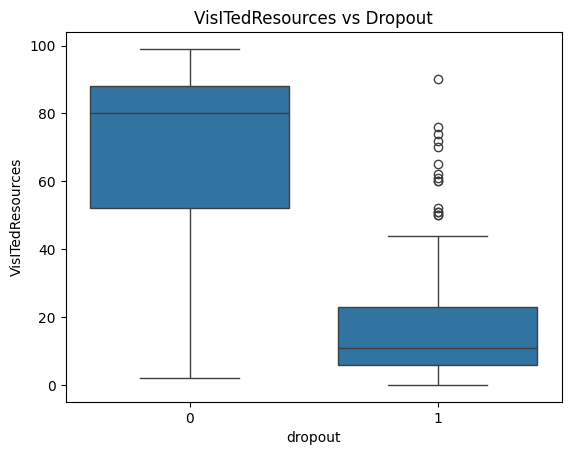

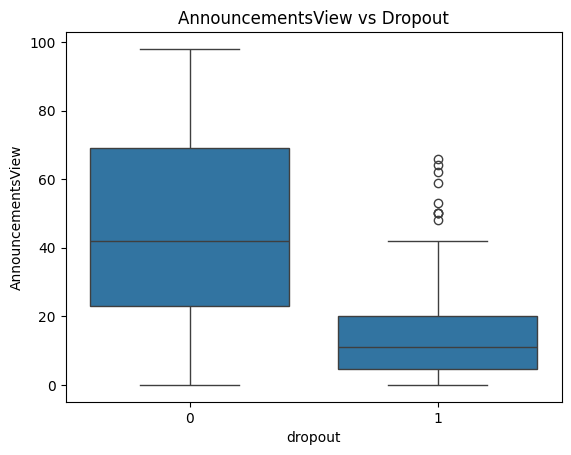

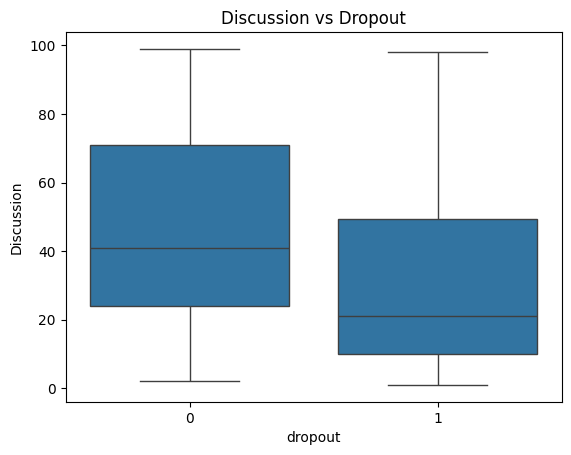

In [68]:
num_cols = [
    'raisedhands',
    'VisITedResources',
    'AnnouncementsView',
    'Discussion'
]

for col in num_cols:
    sns.boxplot(x='dropout', y=col, data=df)
    plt.title(f"{col} vs Dropout")
    plt.show()

Absence Days vs Dropout

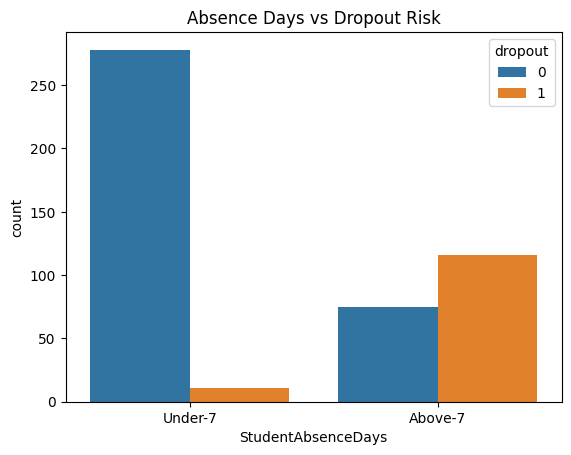

In [69]:
#Students with high absence have much higher dropout risk
#Strong early warning indicator

sns.countplot(x='StudentAbsenceDays', hue='dropout', data=df)
plt.title("Absence Days vs Dropout Risk")
plt.show()

Categorical Feature Analysis
Gender vs Dropout

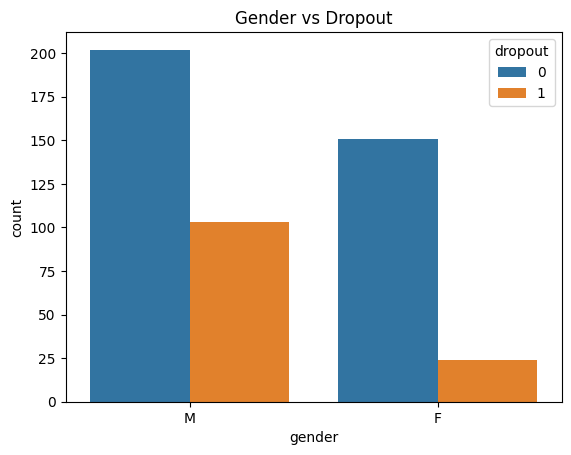

In [70]:
sns.countplot(x='gender', hue='dropout', data=df)
plt.title("Gender vs Dropout")
plt.show()

Parent Involvement vs Dropout

*   Weak parental involvement correlates with higher dropout risk



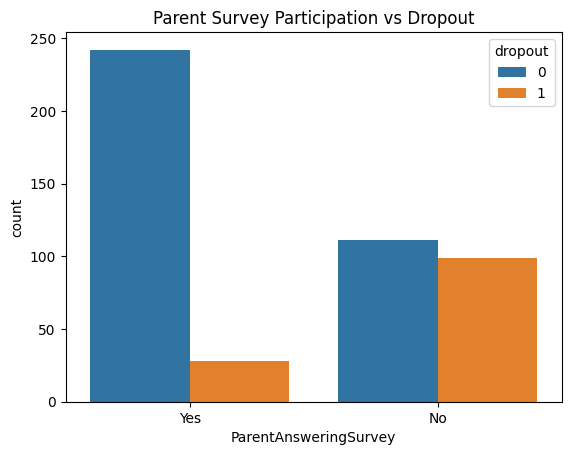

In [71]:
sns.countplot(x='ParentAnsweringSurvey', hue='dropout', data=df)
plt.title("Parent Survey Participation vs Dropout")
plt.show()


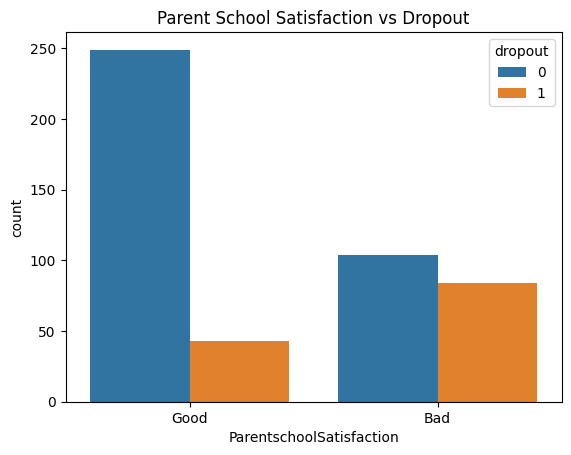

In [72]:
sns.countplot(x='ParentschoolSatisfaction', hue='dropout', data=df)
plt.title("Parent School Satisfaction vs Dropout")
plt.show()

Correlation Heatmap (Numerical)
* Engagement features negatively correlate with dropout
* Absenteeism positively correlates

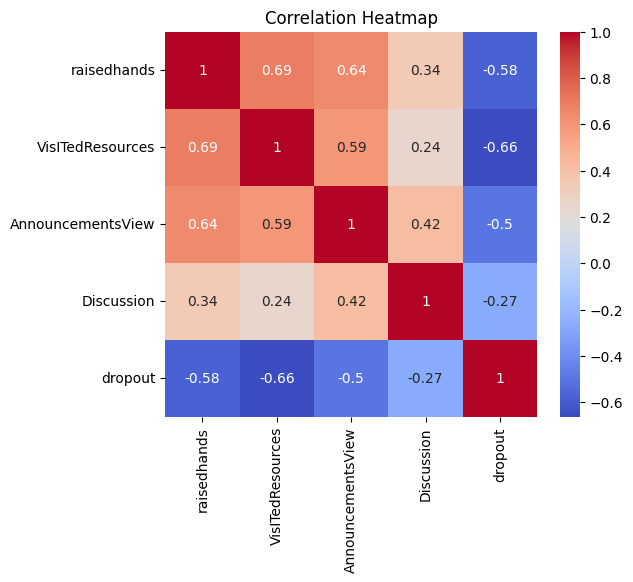

In [73]:
corr = df[num_cols + ['dropout']].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


EDA Summary (For Report)

* Exploratory Data Analysis revealed that students at risk of dropout exhibit lower LMS engagement, reduced classroom participation, and higher absenteeism. Parental involvement and school satisfaction also show a clear relationship with student retention. These patterns confirm that early-semester behavioral features are strong predictors of dropout risk.

Split Data (Before Preprocessing!)

* Prevents data leakage
* Simulates real-world prediction

#Train–Test Split & Training

#Preprocessing Pipeline

In [80]:
num_cols = [
    'raisedhands','VisITedResources',
    'AnnouncementsView','Discussion'
]

# Ensure cat_cols are derived from the updated X after dropping 'student_id' and 'Class'
cat_cols = [col for col in X.columns if col not in num_cols]

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

#Model Selection
* Logistic Regression

*     Transparent

*     Produces probability (risk score)

*     Easy to explain to advisors

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
# This model definition is part of the overall pipeline, direct fitting is not needed here.
model = LogisticRegression(max_iter=1000) # Changed 'max_depath' to 'max_iter' for LogisticRegression
# model.fit(X_train, y_train) # This line is removed as the pipeline handles fitting.

In [96]:
from sklearn.metrics import accuracy_score, classification_report

In [97]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    class_weight='balanced',
    max_iter=1000
)


*Build Full ML Pipeline*
* Advantage

Same pipeline used for:
*     Training
*     Testing
*     Streamlit
*     New data

In [81]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', model)
])

Train the Model

In [98]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['raisedhands',
                                                   'VisITedResources',
                                                   'AnnouncementsView',
                                                   'Discussion']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'NationalITy',
                                                   'PlaceofBirth', 'StageID',
                                                   'GradeID', 'SectionID',
                                                   'Topic', 'Semester',
                                                   'Relation',
                                                   'ParentAnsweringSurvey',
                                                   'ParentschoolSatisfaction',
                                                   'StudentAbsenceDays'])])),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

Model Evaluation (Early Warning Focus)
Priority Metric

*  Recall
Why Threshold = 0.4?

Higher recall

Acceptable false positives

In [99]:
from sklearn.metrics import classification_report, roc_auc_score

y_prob = pipeline.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.4).astype(int)

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94        71
           1       0.77      0.96      0.86        25

    accuracy                           0.92        96
   macro avg       0.88      0.93      0.90        96
weighted avg       0.93      0.92      0.92        96

ROC-AUC: 0.9825352112676057


Risk Scoring (Expected Output)

* This directly meets:

✔ Risk score

✔ Risk label

✔ Dropout prediction



In [84]:
# Original code to calculate risk scores and labels
df['risk_score'] = pipeline.predict_proba(X)[:, 1]

def risk_label(score):
    if score >= 0.7:
        return "High"
    elif score >= 0.4:
        return "Medium"
    else:
        return "Low"

df['risk_label'] = df['risk_score'].apply(risk_label)
df['predicted_dropout'] = (df['risk_score'] >= 0.4).astype(int)

print(df['risk_score'])
print(df['risk_label'])

0      0.264166
1      0.208204
2      0.975956
3      0.931319
4      0.791274
         ...   
475    0.997287
476    0.075259
477    0.051076
478    0.912888
479    0.874915
Name: risk_score, Length: 480, dtype: float64
0       Low
1       Low
2      High
3      High
4      High
       ... 
475    High
476     Low
477     Low
478    High
479    High
Name: risk_label, Length: 480, dtype: object


Save Model & Artifacts

In [85]:
import joblib

joblib.dump(pipeline, "student_dropout_model.joblib")

df[['risk_score','risk_label','predicted_dropout']] \
    .to_csv("student_dropout_predictions.csv", index=True)


In [86]:
#Save Predictions CSV

output = df[['risk_score', 'risk_label', 'predicted_dropout']]
output.to_csv("student_dropout_predictions.csv", index=True)
